# Regression Final Projesi

## Zingat İstanbul Satılık Konut Verileri

Bu projemizde web scraping ile zingat.com adresinden emlak verilerini çekip, inceleyeceğiz. Feature Engineering işlemlerini yaptıktan sonra bazı göreselleştirmeleri de bitirip Regression Algoritmaları ile modelleme yapacağız.

<img src="zingat.jpg">

### Web Scraping
Web scraping, bir web sitesinden otomatik olarak veri çekme işlemine verilen isimdir. Bu işlem, bir web sayfasının içeriğini analiz ederek, belirli verileri çekme veya kazıma amacıyla yapılır. Web scraping, verileri manuel olarak elde etmek yerine otomatikleştirilmiş bir şekilde toplamak için kullanılır.
​
Python, web scraping için popüler bir programlama dilidir çünkü çeşitli kütüphaneler ve araçlar sunar. Bu kütüphaneler, web sayfalarını yüklemek, içeriği analiz etmek ve istenilen verileri çekmek için kullanılabilir. Özellikle requests, BeautifulSoup, Selenium gibi kütüphaneler web scraping işlemleri için sıkça tercih edilir.
​
Web scraping genellikle aşağıdaki amaçlarla kullanılır:
​
Veri Toplama: Örneğin, fiyat karşılaştırmaları yapmak, ürün stoklarını kontrol etmek veya haber başlıklarını toplamak gibi veri toplama işlemleri için kullanılır.
Analiz ve Tahminler: Büyük veri kümesi üzerinde analiz yapmak ve trendleri belirlemek için web scraping kullanılabilir.
Rakip Analizi: Rakiplerin ürünleri, fiyatları veya stratejileri hakkında bilgi edinmek için kullanılabilir.
Pazar Araştırması: Tüketici görüşlerini, incelemeleri veya anket sonuçlarını toplamak için web scraping yapılabilir.
Ancak, web scraping yaparken hukuki ve etik sorunları dikkate almak önemlidir. Web scraping, bir web sitesinin kullanım koşullarına veya telif hakkı haklarına aykırı olabilir. Bu nedenle, veri toplarken hedef web sitesinin politikalarını okumak ve uygun izinleri almak önemlidir.

In [4]:
from bs4 import BeautifulSoup as bs
import requests
import os
import pandas as pd
from IPython.display import clear_output
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from csv import writer
import re
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',100)

import warnings
warnings.filterwarnings("ignore")

In [9]:
tumiller = ['istanbul']

In [10]:
iller = []
sayfalar = []
for il in tumiller:
    url="https://www.zingat.com/" + il +"-satilik-daire?page="
    iller.append(url)
z = 1
for i in range(0,len(iller)):
    clear_output(wait=True)
    print(z)
    illistesi = requests.get(iller[i]).text
    soup = bs(illistesi, 'html.parser')
    try:
        pag = soup.find("nav", "zng-pagination")['data-total']
        for j in range(2, int(pag)):
            sayfa = iller[i] + str(j)
            sayfalar.append(sayfa)
            z = z + 1
    except:
        continue
sayfalar.extend(iller)

1


In [11]:
sayfaurl = []
satisurl = []
k = 1
m = 1
for sayfa in sayfalar:
    clear_output(wait=True)
    print(m)
    req = requests.get(sayfa)
    soup = bs(req.text, "html.parser")
    sayfaurl.append(soup.select(".zl-card-inner"))
    m = m + 1
for page in sayfaurl:
    for link in page:
        satisurl.append("https://www.zingat.com" + link.get("href"))

47


In [12]:
ozellikler = []
fiyatlar = []
mahalle = []
ilce =[]
il = []
gun = []
ay = []
yil = []
n = 1

for url in satisurl:
    try:
        clear_output(wait=True) 
        print(n)
        req = requests.get(url)
        soup = bs(req.text, "html.parser")
        ozellikler.append([tag.text.strip() for tag in soup.find_all(["strong", "span"], {"class": "col-md-6"})])
        fiyatlar.append(soup.find("strong", itemprop = "price").text.replace("TL", "").replace(".","").replace(" ",""))
        mahalle.append(soup.find("div", "detail-location-path__map").find("h2").text.replace("\n","").replace(" ", "").split(",")[0])
        ilce.append(soup.find("div", "detail-location-path__map").find("h2").text.replace("\n","").replace(" ", "").split(",")[1])
        il.append(soup.find("div", "detail-location-path__map").find("h2").text.replace("\n","").replace(" ", "").split(",")[2])
        gun.append(soup.find("div", "detail-info not-printable").find_all("div")[3].find("strong").text.split(" ")[0])
        ay.append(soup.find("div", "detail-info not-printable").find_all("div")[3].find("strong").text.split(" ")[1])
        yil.append(soup.find("div", "detail-info not-printable").find_all("div")[3].find("strong").text.split(" ")[2])
        n = n + 1
    except:
        continue
    
ozelliklerYeni = []
for ozellik in ozellikler:
    ozelliklerYeni.append(dict(zip(ozellik[::2], ozellik[1::2])))

987


In [14]:
df = pd.DataFrame(ozelliklerYeni)

In [16]:
pd.set_option('display.max_columns',100)

In [17]:
df.head()

,İlan Tarihi,İlan no,Net m²,Brüt m²,Oda Sayısı,Banyo Sayısı,Binadaki Kat Sayısı,Isıtma Tipi,Konut Şekli,Bulunduğu Kat,Görüntülü Ev Gezintisi\n ?,Bina Yaşı,Mobilya Durumu,Kullanım Durumu,Yapının Durumu,Kimden,Tapu Durumu,Krediye Uygun,Takasa Uygun,Hayvan Dostu Patili Evler,Aidat,Kira Getirisi,Parsel,Ada
0,23 Ağustos 2023,4863646,110,120m²,3+1,2,10,Kombi (Doğalgaz),Ara Kat,4,Hayır,0,Eşyasız,Boş,Sıfır,Danışman,Kat İrtifakı,Evet,NaN,NaN,NaN,NaN,NaN,NaN
1,23 Ağustos 2023,4863704,90,100m²,2+1,1,4,Kalorifer (Doğalgaz),Ara Kat,1,Hayır,3,Eşyasız,Boş,Sıfır,Danışman,İskanı Alınmış,Evet,Evet,NaN,NaN,NaN,NaN,NaN
2,22 Ağustos 2023,4862697,120,140m²,3+1,1,4,Kombi (Doğalgaz),Ara Kat,7,Hayır,2,Eşyasız,Kiracılı,Sıfır,İnşaat Geliştirici,Kat Mülkiyeti,Evet,Evet,Evet,NaN,NaN,NaN,NaN
3,22 Ağustos 2023,4827458,95,110m²,1+1,1,8,Kombi (Doğalgaz),Ara Kat,3,Evet,3,Eşyasız,Mülk Sahibi,İkinci El,Danışman,Kat Mülkiyeti,Evet,Evet,NaN,0 TL (aylık),0 TL (aylık),NaN,NaN
4,22 Ağustos 2023,4798528,250,280m²,6+2,2,6,Kombi (Doğalgaz),NaN,En Üst Kat,NaN,0,Eşyasız,Boş,Sıfır,NaN,Kat Mülkiyeti,Evet,NaN,NaN,150 TL (aylık),30.000 TL (aylık),NaN,NaN


In [18]:
df['Fiyat'] = pd.Series(fiyatlar)
df['İl'] = pd.Series(il)
df['İlçe'] = pd.Series(ilce)
df['Mahalle'] = pd.Series(mahalle)
df['İlan Gün'] = pd.Series(gun)
df['İlan Ay'] = pd.Series(ay)
df["İlan Yıl"] = pd.Series(yil)

In [31]:
df.drop(['Takasa Uygun','Aidat','Kira Getirisi','Ada','Kimden','Konut Şekli','Hayvan Dostu Patili Evler','Tapu Durumu','Parsel',"Kira Getirisi","İlan Tarihi"], axis=1, inplace=True)

df = df['Oda Sayısı'].str.rsplit('+', 0, expand=True).join(df)
df=df.rename(columns = {0:'İlan Oda Sayısı'})
df=df.rename(columns = {1:'İlan Salon Sayısı'})
del df['Oda Sayısı']
df[['Brüt m²']] = df[['Brüt m²']].replace('m²', '', regex=True)

KeyError: "['Takasa Uygun', 'Aidat', 'Kira Getirisi', 'Ada', 'Kimden', 'Konut Şekli', 'Hayvan Dostu Patili Evler', 'Tapu Durumu', 'Parsel', 'Kira Getirisi'] not found in axis"

In [32]:
df.sample(7)

,İlan Oda Sayısı,İlan Salon Sayısı,İlan Tarihi,İlan no,Net m²,Brüt m²,Banyo Sayısı,Binadaki Kat Sayısı,Isıtma Tipi,Bulunduğu Kat,Görüntülü Ev Gezintisi\n ?,Bina Yaşı,Mobilya Durumu,Kullanım Durumu,Yapının Durumu,Krediye Uygun,Fiyat,İl,İlçe,Mahalle,İlan Gün,İlan Ay,İlan Yıl
551,2,1,24 Ağustos 2023,4865047,100,115,1,5,Kombi (Doğalgaz),3,NaN,6-10 arası,NaN,Mülk Sahibi,İkinci El,Evet,2480000000,İstanbul,Pendik,AhmetYesevi,24,Ağustos,2023
887,2,1,22 Ağustos 2023,4827531,75,85,1,4,NaN,Bahçe katı,Evet,0,Eşyasız,Boş,Sıfır,Evet,2350000,İstanbul,Avcılar,Gümüşpala,22,Ağustos,2023
63,2,1,1 Ağustos 2023,4838601,95,105,2,6,Kombi (Doğalgaz),NaN,Evet,0,NaN,Boş,Sıfır,Evet,6350000,İstanbul,Kağıthane,YahyaKemal,1,Ağustos,2023
534,2,1,23 Ağustos 2023,4798770,85,100,1,4,Klima,Bahçe katı,Hayır,21-25 arası,Sadece Beyaz Eşya,Boş,NaN,Hayır,1520000,İstanbul,Kartal,Esentepe,23,Ağustos,2023
772,3,2,23 Ağustos 2023,4764363,160,175,2,4,NaN,4,Hayır,0,Eşyasız,Boş,NaN,Evet,3900000,İstanbul,Beylikdüzü,Kavaklı,23,Ağustos,2023
722,2,1,23 Ağustos 2023,4726553,110,130,1,9,Kombi (Doğalgaz),Giriş Katı,Evet,4,Eşyasız,Boş,Sıfır,Evet,2420000,İstanbul,Beylikdüzü,AdnanKahveci,23,Ağustos,2023
923,1,1,22 Ağustos 2023,4863224,50,60,1,4,Klima,Yüksek Giriş,Hayır,0,Eşyasız,Boş,NaN,Evet,1500000,İstanbul,Esenler,Fatih,22,Ağustos,2023


In [22]:
#Veriyi çektikten sonra kaydettik
df.to_csv('istanbulzingat.csv', index=False)

# EDA- Exploratary Data Analysis

In [2]:
df=pd.read_csv("istanbulzingat.csv")

In [5]:
df.sample(3)

,İlan Oda Sayısı,İlan Salon Sayısı,İlan Tarihi,İlan no,Net m²,Brüt m²,Banyo Sayısı,Binadaki Kat Sayısı,Isıtma Tipi,Bulunduğu Kat,Görüntülü Ev Gezintisi\n ?,Bina Yaşı,Mobilya Durumu,Kullanım Durumu,Yapının Durumu,Krediye Uygun,Fiyat,İl,İlçe,Mahalle,İlan Gün,İlan Ay,İlan Yıl
654,1.0,1,23 Ağustos 2023,4693687,65,85,1,20 ve üzeri,Klima,5,Hayır,11-15 arası,Sadece Beyaz Eşya,Kiracılı,NaN,Evet,5250000,İstanbul,Sarıyer,Maslak,23,Ağustos,2023
170,3.0,1,24 Ağustos 2023,4829164,100,125,1,4,Kombi (Doğalgaz),3,Evet,40 ve üzeri,Eşyasız,Mülk Sahibi,İkinci El,Evet,5950000,İstanbul,Şişli,Merkez,24,Ağustos,2023
320,2.0,1,24 Ağustos 2023,3567387,90,100,2,4,Kombi (Doğalgaz),3,NaN,16-20 arası,Eşyasız,NaN,NaN,Evet,3250000,İstanbul,Beyoğlu,KüçükPiyale,24,Ağustos,2023


In [7]:
df.shape

(987, 23)

In [8]:
df.describe() #sayısal veriler üzerinden istatiksel değerler

,İlan Oda Sayısı,İlan no,Net m²,Brüt m²,Fiyat,İlan Gün,İlan Yıl
count,973.000000,9.870000e+02,987.000000,987.000000,9.870000e+02,987.000000,987.0
mean,2.602261,4.738345e+06,113.937183,133.674772,8.706647e+06,21.834853,2023.0
std,0.972394,1.912747e+05,45.865379,55.526382,7.936374e+07,4.489347,0.0
min,1.000000,2.132999e+06,30.000000,40.000000,7.200000e+05,1.000000,2023.0
25%,2.000000,4.694280e+06,85.000000,95.500000,2.100000e+06,22.000000,2023.0
50%,2.000000,4.797852e+06,105.000000,120.000000,3.290000e+06,23.000000,2023.0
75%,3.000000,4.842123e+06,130.000000,155.000000,6.375000e+06,24.000000,2023.0
max,8.000000,4.865636e+06,377.000000,475.000000,2.480000e+09,31.000000,2023.0


In [9]:
df.corr()

,İlan Oda Sayısı,İlan no,Net m²,Brüt m²,Fiyat,İlan Gün,İlan Yıl
İlan Oda Sayısı,1.000000,-0.059256,0.807072,0.796202,0.027899,-0.071586,NaN
İlan no,-0.059256,1.000000,-0.061199,-0.061060,0.015741,-0.046794,NaN
Net m²,0.807072,-0.061199,1.000000,0.961631,0.058305,-0.015866,NaN
Brüt m²,0.796202,-0.061060,0.961631,1.000000,0.064503,-0.029989,NaN
Fiyat,0.027899,0.015741,0.058305,0.064503,1.000000,0.011867,NaN
İlan Gün,-0.071586,-0.046794,-0.015866,-0.029989,0.011867,1.000000,NaN
İlan Yıl,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 23 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   İlan Oda Sayısı                                                                           973 non-null    float64
 1   İlan Salon Sayısı                                                                         973 non-null    object 
 2   İlan Tarihi                                                                               987 non-null    object 
 3   İlan no                                                                                   987 non-null    int64  
 4   Net m²                                                                                    987 non-null    int64  
 5   Brüt m²                                                  

In [18]:
df.İlçe.value_counts()

Beylikdüzü       131
Esenyurt         120
Kadıköy           56
Sarıyer           54
Sancaktepe        53
Çekmeköy          44
Esenler           35
Avcılar           35
Kartal            33
Eyüpsultan        32
Maltepe           31
Pendik            28
Sultanbeyli       24
Kağıthane         24
Beşiktaş          23
Üsküdar           21
Küçükçekmece      21
Başakşehir        20
Şişli             20
Gaziosmanpaşa     20
Ataşehir          18
Büyükçekmece      17
Fatih             16
Bağcılar          16
Bahçelievler      13
Ümraniye          13
Zeytinburnu       12
Tuzla             10
Bakırköy           9
Sultangazi         8
Bayrampaşa         7
Güngören           7
Beyoğlu            7
Silivri            5
Arnavutköy         3
Beykoz             1
Name: İlçe, dtype: int64

# Veri Görselleştirmesi

Text(0, 0.5, 'İlçe')

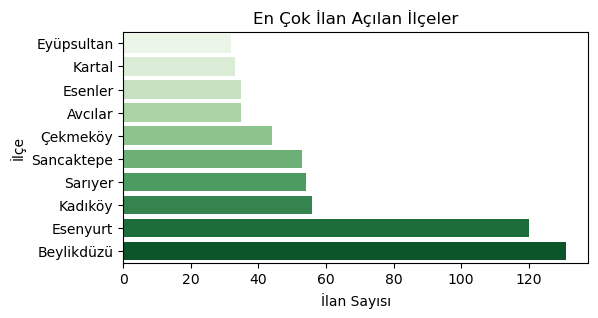

In [30]:
districts = df["İlçe"].value_counts()[0:10].sort_values()
plt.figure(figsize=(6,3))
plot = sns.barplot(x = districts.values, y = districts.index, palette="Greens")
plt.title("En Çok İlan Açılan İlçeler")
plt.xlabel("İlan Sayısı")
plt.ylabel("İlçe")

Text(0.5, 1.0, 'Apartmanların Yaş Durumu')

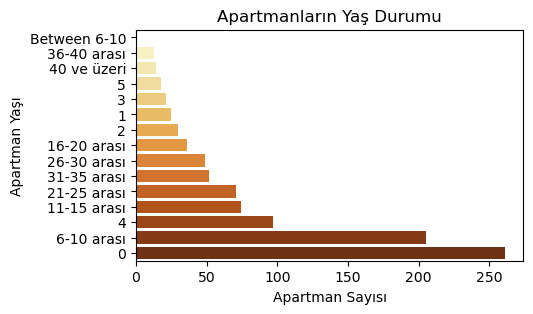

In [29]:
apt_age = df["Bina Yaşı"].value_counts().sort_values(ascending=True)
plt.figure(figsize = (5,3))
sns.barplot(x = apt_age.values, y = apt_age.index, palette="YlOrBr", orient="h")
plt.xlabel("Apartman Sayısı")
plt.ylabel("Apartman Yaşı")
plt.title("Apartmanların Yaş Durumu")

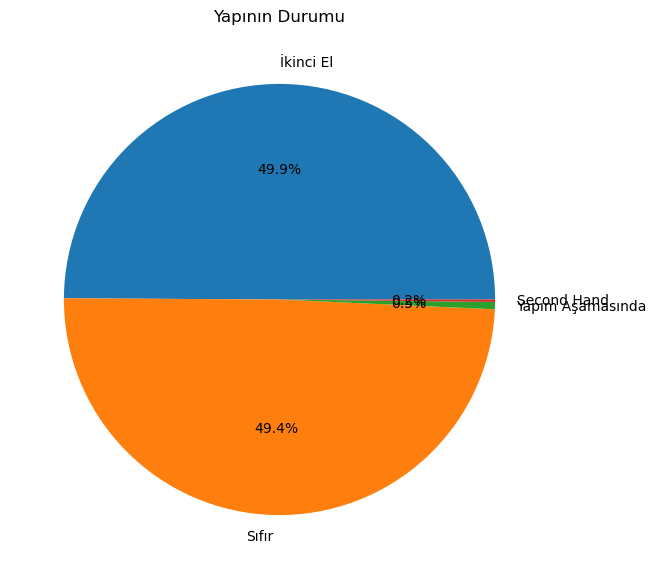

In [23]:
fig = plt.figure(figsize=(15,7))
df["Yapının Durumu"].value_counts().plot(kind = 'pie',autopct='%.1f%%')
plt.ylabel("", fontsize = 10)
plt.title("Yapının Durumu");

# Veri Analizi ve Düzenleme

In [12]:
df.drop(["İlan Tarihi", "İl"], axis=1, inplace=True)

In [41]:
df["İlan Ay"].value_counts()

Ağustos    971
Temmuz      16
Name: İlan Ay, dtype: int64

In [42]:
df["İlan Ay"].replace({'Temmuz':'7', "Ağustos":"8"}, regex=True, inplace=True)

In [50]:
df["Mobilya Durumu"].value_counts()

0    708
1    279
Name: Mobilya Durumu, dtype: int64

In [48]:
df['Mobilya Durumu']=np.where(df['Mobilya Durumu']=='Eşyasız',0,1)

In [51]:
df['Fiyat'].replace({'\n':'',',':'',' TL':''},regex=True,inplace=True)

In [68]:
df['Isıtma Tipi'].value_counts()

Kombi (Doğalgaz)              470
4                             139
3                             131
2                              23
Kalorifer (Doğalgaz)           15
Soba (Doğalgaz)                 4
0                               3
Combi Boiler (Natural Gas)      1
Kombi (Elektrikli)              1
Name: Isıtma Tipi, dtype: int64

In [67]:
df['Isıtma Tipi'].replace({"Güneş Enerjisi":1,"Kombi (Elektrikli)":1, "Combi Boiler (Natural Gas)":0,"Fancoil":0,'Soba (Doğalgaz)':3,'Kalorifer (Doğalgaz)':4,"Yerden Isıtma":4,'Klima':5,'Merkezi Sistem':6,'Merkezi Sistem (Isı Payı Ölçer)':6,'Kombi (Doğalgaz)':7},regex=True,inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 21 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   İlan Oda Sayısı                                                                           973 non-null    float64
 1   İlan Salon Sayısı                                                                         973 non-null    object 
 2   İlan no                                                                                   987 non-null    int64  
 3   Net m²                                                                                    987 non-null    int64  
 4   Brüt m²                                                                                   987 non-null    int64  
 5   Banyo Sayısı                                             

In [35]:
old_cols = df.columns.values 
new_cols = ['İlan no','İlan Oda Sayısı', 'İlan Salon Sayısı',
       'Net m²', 'Brüt m²', 'Banyo Sayısı', 'Binadaki Kat Sayısı',
       'Isıtma Tipi', 'Bulunduğu Kat', 'Krediye Uygun',"Bina Yaşı",'İlçe','Fiyat',"Yapının Durumu","Kullanım Durumu","Mobilya Durumu"]
df = df.reindex(columns=new_cols)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   İlan no              987 non-null    int64  
 1   İlan Oda Sayısı      973 non-null    float64
 2   İlan Salon Sayısı    973 non-null    object 
 3   Net m²               987 non-null    int64  
 4   Brüt m²              987 non-null    int64  
 5   Banyo Sayısı         973 non-null    object 
 6   Binadaki Kat Sayısı  968 non-null    object 
 7   Isıtma Tipi          987 non-null    object 
 8   Bulunduğu Kat        987 non-null    object 
 9   Krediye Uygun        987 non-null    object 
 10  Bina Yaşı            967 non-null    object 
 11  İlçe                 987 non-null    object 
 12  Fiyat                987 non-null    int64  
 13  Yapının Durumu       551 non-null    object 
 14  Kullanım Durumu      932 non-null    object 
 15  Mobilya Durumu       891 non-null    obj

In [86]:
df["Mobilya Durumu"].value_counts()

0    709
1    182
Name: Mobilya Durumu, dtype: int64

In [85]:
df.loc[df["Mobilya Durumu"] == "Eşyasız", "Mobilya Durumu"] = "0"
df.loc[df["Mobilya Durumu"] == "Sadece Beyaz Eşya", "Mobilya Durumu"] = "1"
df.loc[df["Mobilya Durumu"] == "Eşyalı (Mobilyalı)", "Mobilya Durumu"] = "1"
df.loc[df["Mobilya Durumu"] == "Sadece Mutfak", "Mobilya Durumu"] = "1"
df.loc[df["Mobilya Durumu"] == "Unfurnished", "Mobilya Durumu"] = "0"

In [82]:
df.loc[df["Kullanım Durumu"] == "Boş", "Kullanım Durumu"] = "0"
df.loc[df["Kullanım Durumu"] == "Kiracılı", "Kullanım Durumu"] = "1"
df.loc[df["Kullanım Durumu"] == "Mülk Sahibi", "Kullanım Durumu"] = "1"
df.loc[df["Kullanım Durumu"] == "Occupied By Tenant", "Kullanım Durumu"] = "1"

In [79]:
df.loc[df["Yapının Durumu"] == "İkinci El", "Yapının Durumu"] = "1"
df.loc[df["Yapının Durumu"] == "Sıfır", "Yapının Durumu"] = "0"
df.loc[df["Yapının Durumu"] == "Yapım Aşamasında", "Yapının Durumu"] = "0"
df.loc[df["Yapının Durumu"] == "Second Hand", "Yapının Durumu"] = "1"

In [115]:
df.loc[df["Bina Yaşı"] == "6-10", "Bina Yaşı"] = "8"
df.loc[df["Bina Yaşı"] == "11-15", "Bina Yaşı"] = "13"
df.loc[df["Bina Yaşı"] == "21-25", "Bina Yaşı"] = "23"
df.loc[df["Bina Yaşı"] == "31-35", "Bina Yaşı"] = "33"
df.loc[df["Bina Yaşı"] == "26-30", "Bina Yaşı"] = "28"
df.loc[df["Bina Yaşı"] == "16-20", "Bina Yaşı"] = "18"
df.loc[df["Bina Yaşı"] == "40", "Bina Yaşı"] = "40"
df.loc[df["Bina Yaşı"] == "36-40", "Bina Yaşı"] = "36"
df.loc[df["Bina Yaşı"] == "6-10", "Bina Yaşı"] = "8"


df["Bulunduğu Kat"] = df["Bulunduğu Kat"].astype(str)

In [71]:
df.loc[df["Krediye Uygun"] == "Evet" , "Krediye Uygun"] = "1"
df.loc[df["Krediye Uygun"] == "Yes" , "Krediye Uygun"] = "1"
df.loc[df["Krediye Uygun"] == "Hayır" , "Krediye Uygun"] = "0"
df.loc[df["Krediye Uygun"] == "No" , "Krediye Uygun"] = "0"

In [110]:
df.loc[df["Bulunduğu Kat"] == "Bahçe katı", "Bulunduğu Kat"] = "0"
df.loc[df["Bulunduğu Kat"] == "Giriş Katı", "Bulunduğu Kat"] = "0"
df.loc[df["Bulunduğu Kat"] == "Yüksek Giriş", "Bulunduğu Kat"] = "0"

df.loc[df["Bulunduğu Kat"] == "En Üst Kat", "Bulunduğu Kat"] = "7"
df.loc[df["Bulunduğu Kat"] == "20-29", "Bulunduğu Kat"] = "20"
df.loc[df["Bulunduğu Kat"] == "Çatı Katı", "Bulunduğu Kat"] = "7"
df.loc[df["Bulunduğu Kat"] == "Kot 1", "Bulunduğu Kat"] = "-1"
df.loc[df["Bulunduğu Kat"] == "Kot 2", "Bulunduğu Kat"] = "-2"
df.loc[df["Bulunduğu Kat"] == "Kot 3", "Bulunduğu Kat"] = "-3"
df.loc[df["Bulunduğu Kat"] == "Kot 4", "Bulunduğu Kat"] = "-4"
df.loc[df["Bulunduğu Kat"] == "Zemin Kat", "Bulunduğu Kat"] = "0"
df.loc[df["Bulunduğu Kat"] == "Müstakil", "Bulunduğu Kat"] = "1"
df.loc[df["Bulunduğu Kat"] == "Teras Kat", "Bulunduğu Kat"] = "7"
df.loc[df["Bulunduğu Kat"] == "Bodrum Kat", "Bulunduğu Kat"] = "-1"
df.loc[df["Bulunduğu Kat"] == "nan", "Bulunduğu Kat"] = "0"

df["Bulunduğu Kat"] = df["Bulunduğu Kat"].astype(str)

In [60]:
df["Isıtma Tipi"] = df["Isıtma Tipi"].fillna('0')
df.loc[df["Isıtma Tipi"] == "Güneş Enerjisi" , "Isıtma Tipi"] = "1"
df.loc[df["Isıtma Tipi"] == "Fancoil" , "Isıtma Tipi"] = "1"
df.loc[df["Isıtma Tipi"] == "Soba (Doğalgaz)" , "Isıtma Tipi"] = "1"
df.loc[df["Isıtma Tipi"] == "Kombi (Elektrikli)" , "Isıtma Tipi"] = "1"
df.loc[df["Isıtma Tipi"] == "Combi Boiler (Natural Gas)" , "Isıtma Tipi"] = "1"

df.loc[df["Isıtma Tipi"] == "Kalorifer (Doğalgaz)" , "Isıtma Tipi"] = "2"
df.loc[df["Isıtma Tipi"] == "Yerden Isıtma" , "Isıtma Tipi"] = "2"
df.loc[df["Isıtma Tipi"] == "Merkezi Sistem" , "Isıtma Tipi"] = "3"
df.loc[df["Isıtma Tipi"] == "Merkezi Sistem (Isı Payı Ölçer)" , "Isıtma Tipi"] = "3"
df.loc[df["Isıtma Tipi"] == "Klima" , "Isıtma Tipi"] = "2"
df.loc[df["Isıtma Tipi"] == "Kombi (Doğalgaz)" , "Isıtma Tipi"] = "3"

In [44]:
df['İlan Salon Sayısı'] = df['İlan Salon Sayısı'].replace("0 (Stüdyo)", 0)

In [48]:
df["Banyo Sayısı"] = df["Banyo Sayısı"].replace("6 ve üzeri", 6)

In [106]:
df.loc[df["Binadaki Kat Sayısı"] == "10-20", "Binadaki Kat Sayısı"] = "15"
df.loc[df["Binadaki Kat Sayısı"] == "20-29", "Binadaki Kat Sayısı"] = "25"

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   İlan no              987 non-null    int64  
 1   İlan Oda Sayısı      987 non-null    float64
 2   İlan Salon Sayısı    987 non-null    int32  
 3   Net m²               987 non-null    int64  
 4   Brüt m²              987 non-null    int64  
 5   Banyo Sayısı         987 non-null    int32  
 6   Binadaki Kat Sayısı  987 non-null    int32  
 7   Isıtma Tipi          987 non-null    int32  
 8   Bulunduğu Kat        987 non-null    int32  
 9   Krediye Uygun        987 non-null    int32  
 10  Bina Yaşı            987 non-null    object 
 11  İlçe                 987 non-null    object 
 12  Fiyat                987 non-null    int64  
 13  Yapının Durumu       987 non-null    object 
 14  Kullanım Durumu      987 non-null    object 
 15  Mobilya Durumu       987 non-null    obj

In [94]:
df['Bina Yaşı'].fillna(0, inplace=True)
df['Yapının Durumu'].fillna(0, inplace=True)
df['Kullanım Durumu'].fillna(0, inplace=True)
df['Mobilya Durumu'].fillna(0, inplace=True)
df['İlan Oda Sayısı'].fillna(df['İlan Oda Sayısı'].mean(), inplace=True)
df['İlan Salon Sayısı'].fillna(df['İlan Salon Sayısı'].mode().iloc[0], inplace=True)
df['Banyo Sayısı'].fillna(df['Banyo Sayısı'].mode().iloc[0], inplace=True)
df['Binadaki Kat Sayısı'].fillna(df['Binadaki Kat Sayısı'].mode().iloc[0], inplace=True)

In [90]:
abs(df.corr()['Fiyat'].sort_values(ascending=False))

Fiyat              1.000000
Brüt m²            0.064503
Net m²             0.058305
İlan Oda Sayısı    0.027899
İlan no            0.015741
Name: Fiyat, dtype: float64

In [96]:
df["İlan Oda Sayısı"]=df["İlan Oda Sayısı"]**2

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   İlan no              987 non-null    int64  
 1   İlan Oda Sayısı      987 non-null    float64
 2   İlan Salon Sayısı    987 non-null    int32  
 3   Net m²               987 non-null    int64  
 4   Brüt m²              987 non-null    int64  
 5   Banyo Sayısı         987 non-null    int32  
 6   Binadaki Kat Sayısı  987 non-null    int32  
 7   Isıtma Tipi          987 non-null    int32  
 8   Bulunduğu Kat        987 non-null    object 
 9   Krediye Uygun        987 non-null    int32  
 10  Bina Yaşı            987 non-null    object 
 11  İlçe                 987 non-null    object 
 12  Fiyat                987 non-null    int64  
 13  Yapının Durumu       987 non-null    object 
 14  Kullanım Durumu      987 non-null    object 
 15  Mobilya Durumu       987 non-null    obj

In [117]:
df["Bina Yaşı"].value_counts()

0     261
8     206
4      97
13     74
23     71
33     52
28     49
18     36
2      30
1      25
3      21
0      20
5      18
40     14
36     13
Name: Bina Yaşı, dtype: int64

In [118]:
for col in ('İlan Salon Sayısı','Banyo Sayısı','Binadaki Kat Sayısı','Isıtma Tipi','Bulunduğu Kat','Krediye Uygun','Bina Yaşı','Yapının Durumu','Yapının Durumu','Mobilya Durumu') : df[col]=df[col].astype(int) 

# Modelleme

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [125]:
def algo_test(x,y):

        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        XGBC=XGBRegressor()
        dt=DecisionTreeRegressor()
        kn=KNeighborsRegressor()
        
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=13)
        
        algos=[L,R,Lass,E,ETR,GBR,XGBC,dt,kn]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','XGradientBoosting','DecisionTree','KNeighbors']
        
        r2Score = []
        rmse = []
        mae = []
        
        result=pd.DataFrame(columns=['R2_score','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r2Score.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            
        result['R2_score']=r2Score 
        result.RMSE=rmse
        result.MAE=mae


        return result.sort_values('R2_score',ascending=False)


In [126]:
#İlçe için get dummies
dfd=pd.get_dummies(df,drop_first=True)

In [127]:
df_dummies = pd.get_dummies(df.drop(columns=['İlçe']), drop_first=True)
cols = df_dummies.columns.to_list()

In [128]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_dummies=scaler.fit_transform(df_dummies)
df_dummies=pd.DataFrame(df_dummies, columns=cols)

In [129]:
from sklearn.model_selection import train_test_split

x=df_dummies.drop(columns=['Fiyat'])
y=df_dummies['Fiyat']

In [130]:
algo_test(x,y)

,R2_score,RMSE,MAE
XGradientBoosting,0.672304,0.002500,0.001197
Extra Tree,0.519106,0.003029,0.001386
KNeighbors,0.439061,0.003271,0.001314
Gradient Boosting,0.383123,0.003431,0.001388
DecisionTree,0.237135,0.003815,0.001529
Lasso,-0.063126,0.004504,0.002843
ElasticNet,-0.063126,0.004504,0.002843
Ridge,-0.074058,0.004527,0.002968
Linear,-0.074621,0.004528,0.003016


In [141]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   İlan no              987 non-null    float64
 1   İlan Oda Sayısı      987 non-null    float64
 2   İlan Salon Sayısı    987 non-null    float64
 3   Net m²               987 non-null    float64
 4   Brüt m²              987 non-null    float64
 5   Banyo Sayısı         987 non-null    float64
 6   Binadaki Kat Sayısı  987 non-null    float64
 7   Isıtma Tipi          987 non-null    float64
 8   Bulunduğu Kat        987 non-null    float64
 9   Krediye Uygun        987 non-null    float64
 10  Bina Yaşı            987 non-null    float64
 11  Fiyat                987 non-null    float64
 12  Yapının Durumu       987 non-null    float64
 13  Mobilya Durumu       987 non-null    float64
 14  Kullanım Durumu_0    987 non-null    float64
 15  Kullanım Durumu_1    987 non-null    flo

In [145]:
df_dummies.shape

(987, 16)

# Pycaret

In [136]:
#Colabta çalışıyor
#pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [142]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [143]:
pip install threadpoolctl

Note: you may need to restart the kernel to use updated packages.


In [159]:
df_dummies.to_csv('df_dummies.csv', index=False)

In [144]:
# Pycaret
train=df_dummies[:494]
test=df_dummies[494:]

In [146]:
y=train["Fiyat"]
x=train.drop("Fiyat", axis=1)

In [147]:
from pycaret.regression import*

AttributeError: 'NoneType' object has no attribute 'split'

In [148]:
setup(train,target='Fiyat')

NameError: name 'setup' is not defined

In [149]:
compare_models()

NameError: name 'compare_models' is not defined

# Deep Learning

In [153]:
#Derin Öğrenme
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=7)

In [154]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, LSTM, Embedding, Bidirectional, BatchNormalization
model=Sequential()
model.add(Dense(81, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(27, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(19, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')

In [155]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),verbose=1,epochs=30 )

Epoch 1/30
13/13 [==============================] - 1s 19ms/step - loss: 0.0021 - val_loss: 8.6474e-05
Epoch 2/30
13/13 [==============================] - 0s 5ms/step - loss: 9.9533e-05 - val_loss: 2.5915e-05
Epoch 3/30
13/13 [==============================] - 0s 4ms/step - loss: 5.8111e-05 - val_loss: 1.3232e-05
Epoch 4/30
13/13 [==============================] - 0s 5ms/step - loss: 3.0626e-05 - val_loss: 9.2741e-06
Epoch 5/30
13/13 [==============================] - 0s 5ms/step - loss: 3.2220e-05 - val_loss: 8.7114e-06
Epoch 6/30
13/13 [==============================] - 0s 4ms/step - loss: 1.8788e-05 - val_loss: 8.6957e-06
Epoch 7/30
13/13 [==============================] - 0s 5ms/step - loss: 1.7370e-05 - val_loss: 8.6931e-06
Epoch 8/30
13/13 [==============================] - 0s 4ms/step - loss: 1.6750e-05 - val_loss: 8.7206e-06
Epoch 9/30
13/13 [==============================] - 0s 4ms/step - loss: 1.9461e-05 - val_loss: 8.6930e-06
Epoch 10/30
13/13 [==============================

In [156]:
pred=model.predict(x_test)

4/4 [==============================] - 0s 6ms/step


In [157]:
(mean_squared_error(y_test, pred))**.5

0.0029530257260390563

In [158]:
r2_score(y_test, pred)

-0.003147015150028132